# Ingesting new unannotated data into existing annotated data

This is a demonstration of the `tl.ingest` function, which maps labels and embeddings from existing data to new data.

In [1]:
import scanpy as sc
from scanpy.tools._ingest import ingest

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
pbmc = sc.datasets.pbmc68k_reduced()

In [4]:
n_split = 400

In [5]:
adata_ref = sc.AnnData(pbmc.X[:n_split, :], obs=pbmc.obs.iloc[:n_split])
adata_new = sc.AnnData(pbmc.X[n_split:, :])

You have some data processed and annotated already.

C:\Miniconda3\envs\work\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


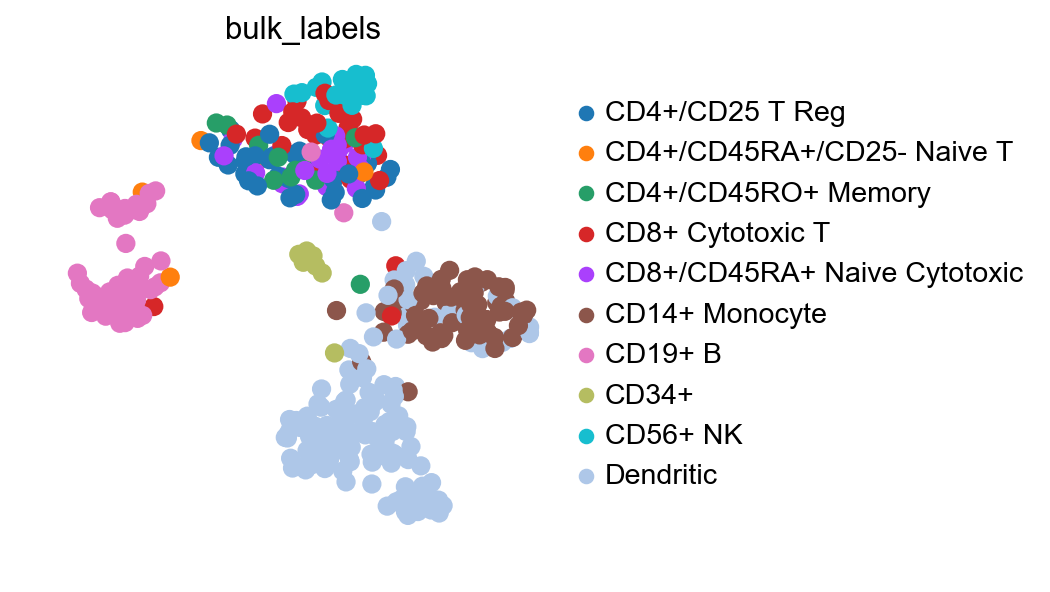

In [6]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='bulk_labels')

You have some new data, about which you don't know anything.

C:\Miniconda3\envs\work\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


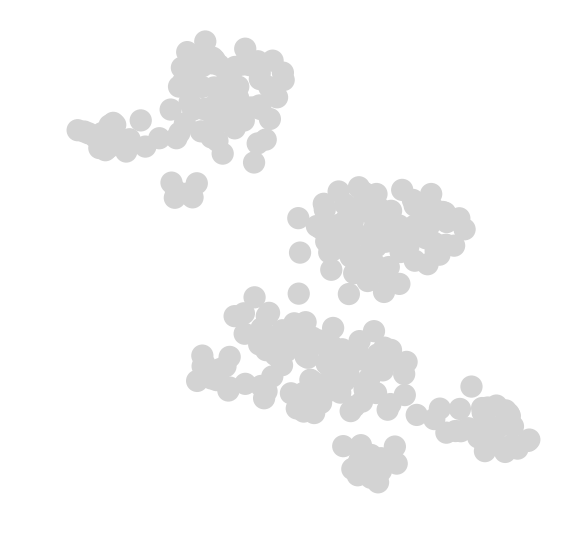

In [7]:
sc.pp.pca(adata_new)
sc.pp.neighbors(adata_new)
sc.tl.umap(adata_new)
sc.pl.umap(adata_new)

Let's map labels and embeddings from `adata_ref` to `adata_new`, based on a chosen representation; here, we use `adata_ref.obsm['X_pca']` to map cluster labels and the UMAP coordinates.

We call the function `ingest`, as we're ingesting `adata_new` into an existing annotated `adata_ref` to produce a joint dataset.

In [8]:
adata_joint = ingest(adata_new, adata_ref, obs='bulk_labels', return_joint=True)

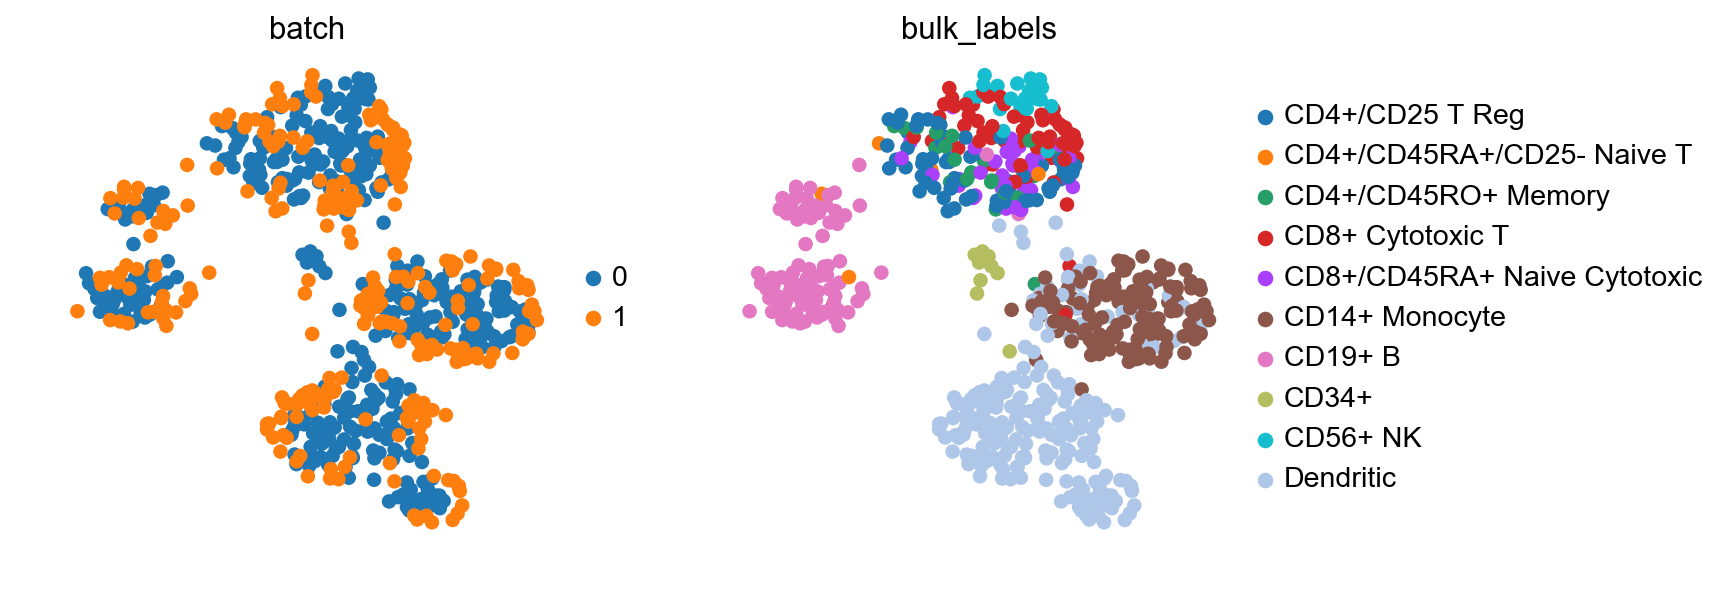

In [9]:
sc.pl.umap(
    adata_joint, color=['batch', 'bulk_labels'],
    palette=adata_ref.uns['bulk_labels_colors'])

<div class="alert alert-info">

**Note**

As the previous step does a fully copy of `adata_ref`, we might prefer to simply annotated adata_new with the mapped labels and coordinates, which is the default.

</div>

In [12]:
ingest(adata_new, adata_ref, obs='bulk_labels')

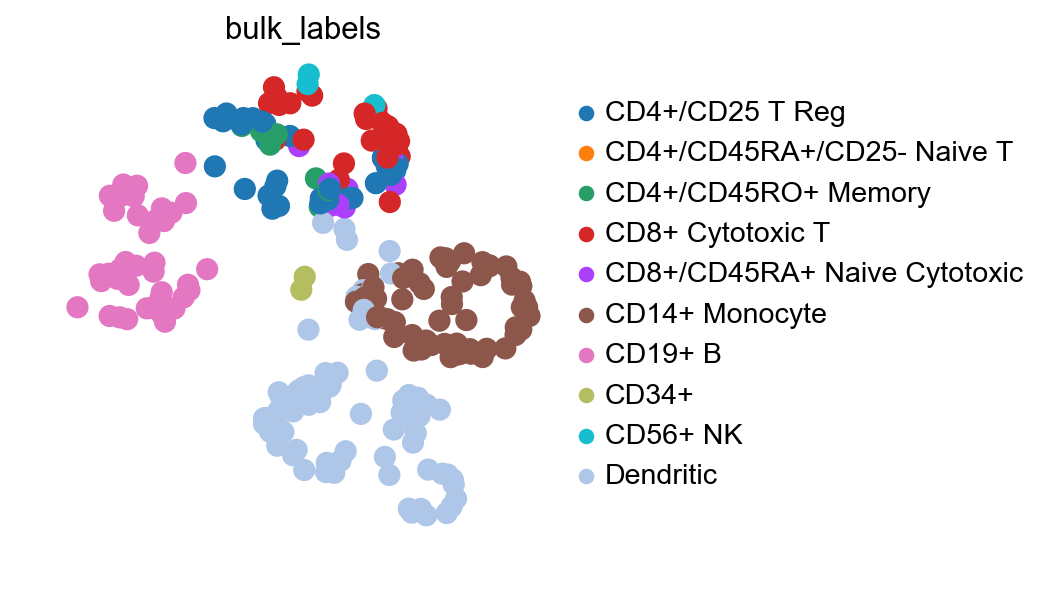

In [13]:
sc.pl.umap(
    adata_new, color='bulk_labels', palette=adata_ref.uns['bulk_labels_colors'])